<a href="https://colab.research.google.com/github/han-juyoung/Aimers_Lectures/blob/main/Deep_Learning_%EB%8B%A4%EC%B8%B5_%ED%8D%BC%EC%85%89%ED%8A%B8%EB%A1%A0(MLP)_%EB%AA%A8%EB%8D%B8%EB%A1%9C_2D_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

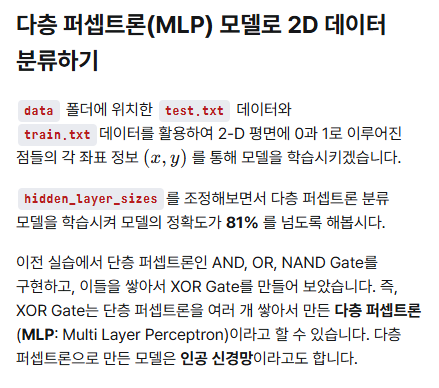

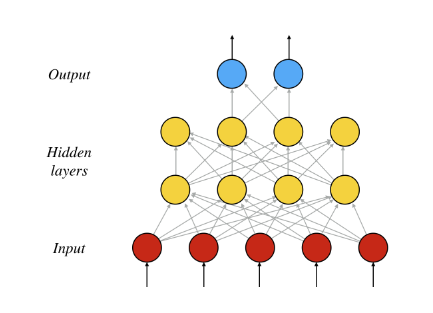

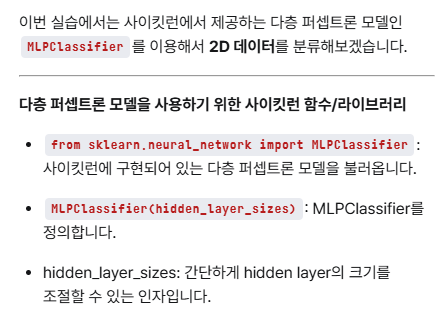

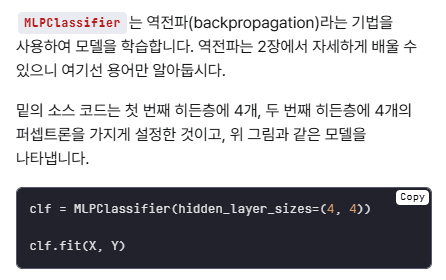

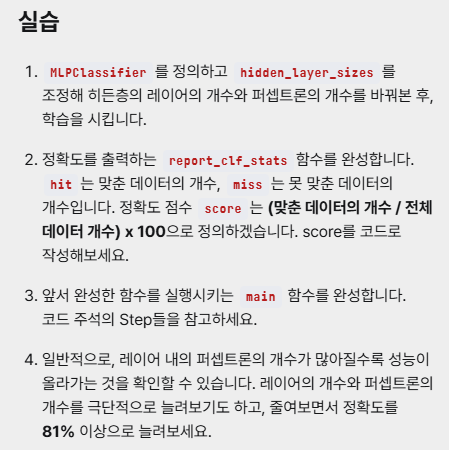

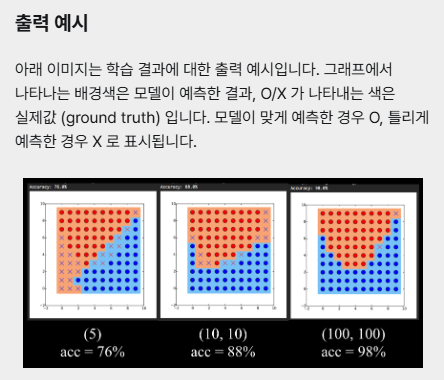

In [ ]:
import numpy as np
from visual import *
from sklearn.neural_network import MLPClassifier

from elice_utils import EliceUtils
elice_utils = EliceUtils()

import warnings
warnings.filterwarnings(action='ignore')

np.random.seed(100)

# 데이터를 읽어오는 함수입니다.

def read_data(filename):

    X = [] # train data
    Y = [] # label

    with open(filename) as fp:
        N, M = fp.readline().split()
        N = int(N)
        M = int(M)

        for i in range(N):
            line = fp.readline().split()
            for j in range(M):
                X.append([i, j])
                Y.append(int(line[j]))

    X = np.array(X)
    Y = np.array(Y)

    return (X, Y)

'''
1. MLPClassifier를 정의하고 hidden_layer_sizes를
   조정해 hidden layer의 크기 및 레이어의 개수를
   바꿔본 후, 학습을 시킵니다.
'''

def train_MLP_classifier(X, Y):

    clf = MLPClassifier(hidden_layer_sizes=(100, 100))

    clf.fit(X, Y)

    return clf

'''
2. 테스트 데이터에 대한 정확도를 출력하는
   함수를 완성합니다. 설명을 보고 score의 코드를
   작성해보세요.
'''

def report_clf_stats(clf, X, Y):

    hit = 0
    miss = 0

    for x, y in zip(X, Y):
        if clf.predict([x])[0] == y:
            hit += 1
        else:
            miss += 1

    score = hit / len(X) * 100

    print("Accuracy: %.1lf%% (%d hit / %d miss)" % (score, hit, miss))

'''
3. main 함수를 완성합니다.

   Step01. 학습용 데이터인 X_train, Y_train과
           테스트용 데이터인 X_test, Y_test를 각각
           read_data에서 반환한 값으로 정의합니다.

           우리가 사용할 train.txt 데이터셋과
           test.txt 데이터셋은 data 폴더에 위치합니다.

   Step02. 앞에서 학습시킨 다층 퍼셉트론 분류
           모델을 'clf'로 정의합니다. 'clf'의 변수로는
           X_train과 Y_train으로 설정합니다.

   Step03. 앞에서 완성한 정확도 출력 함수를
           'score'로 정의합니다. 'score'의 변수로는
           X_test와 Y_test로 설정합니다.
'''

def main():

    X_train, Y_train = read_data('data/train.txt')

    X_test, Y_test = read_data('data/test.txt')

    clf = train_MLP_classifier(X_train, Y_train)

    score = report_clf_stats(clf, X_test, Y_test)

    visualize(clf, X_test, Y_test)

if __name__ == "__main__":
    main()

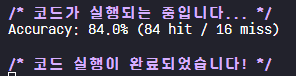

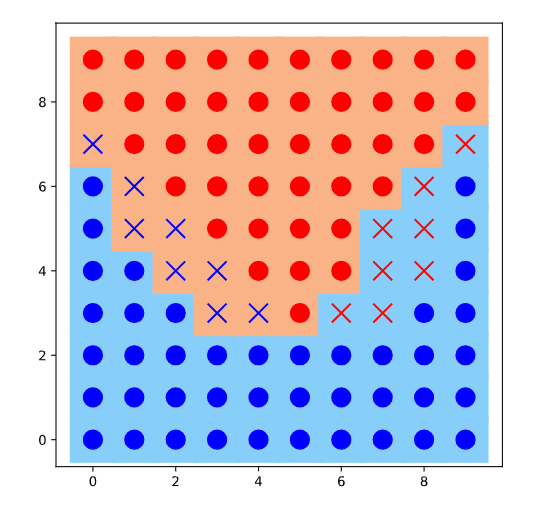